In [7]:
!python --version

Python 3.11.11


Using python 3.11.

In [8]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as pp

In [ ]:
wires = ['A1', 'A2', 'B']
dev = qml.device('default.qubit', wires=wires, shots=None)

In [ ]:
def state_prep(state):
    qml.AmplitudeEmbedding(features=state,wires='A1',normalize=True) #Normalize so that <psi|psi>=1

In [11]:
@qml.qnode(dev)
def Teleport(state):
    state_prep(state)
    qml.Hadamard(wires='A2')
    qml.CNOT(wires=['A2', 'B'])
    qml.CNOT(wires=['A1', 'A2'])
    qml.Hadamard(wires='A1')
    qml.measure(wires='A1')
    qml.measure(wires='A2')
    qml.CNOT(wires=['A2', 'B'])
    qml.CZ(wires=['A1', 'B'])

    return qml.probs(wires='B')

Circuit:


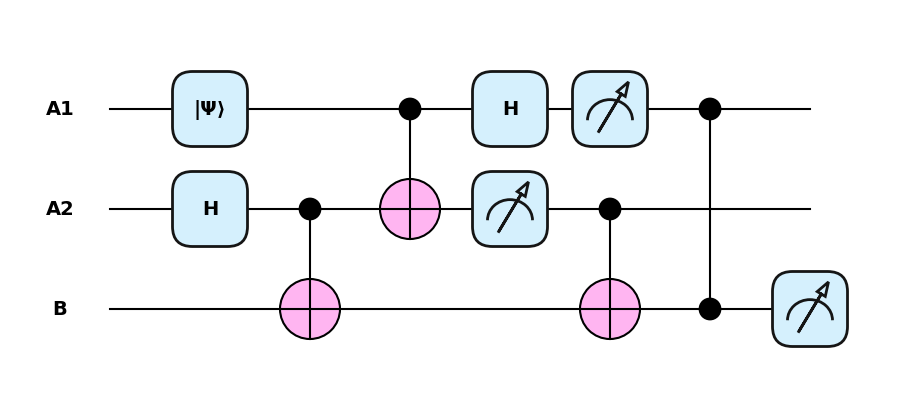

B wire:


array([0.699, 0.301])

In [12]:
qml.drawer.use_style("pennylane")
stateA1 = np.array([np.sqrt(0.7), np.sqrt(0.3)])
qml.draw_mpl(Teleport)(stateA1, shots = None) # Avoid the use of device by none shots.
print('Circuit:')
pp.show()
np.random.seed(1) # used to shots != None
print('B wire:') 
Teleport(stateA1, shots = 1000)
